In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'C:\Users\Sony\Desktop\marketing_clean.csv')


Generating Visualization 1: A/B Test Results...


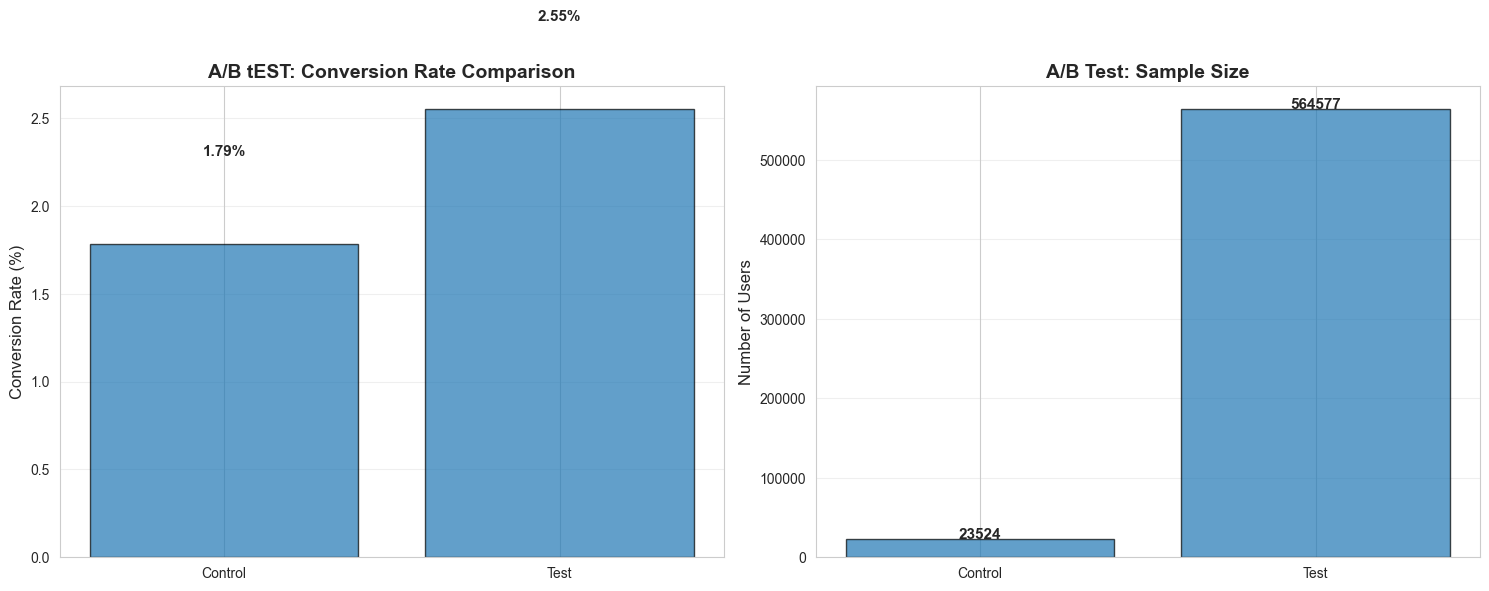

In [2]:
# Set Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']= (12,6)

# A/B TEST RESULTS
print("\nGenerating Visualization 1: A/B Test Results...")

fig,axes= plt.subplots(1,2, figsize=(15,6))

# Conversion rates
ab_results = df.groupby('test_group')['converted'].agg(['sum','count', 'mean']).reset_index()
ab_results['conversion_rate'] = ab_results['mean'] * 100
ab_results['group_name'] = ab_results['test_group'].map({0 : 'Control', 1 : 'Test'})

axes[0].bar(ab_results['group_name'], ab_results['conversion_rate'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Conversion Rate (%)', fontsize=12)
axes[0].set_title('A/B tEST: Conversion Rate Comparison', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i , row in ab_results.iterrows():
    axes[0].text(i, row['conversion_rate'] + 0.5, f"{row['conversion_rate']:.2f}%",
                 ha='center',fontsize=11, fontweight='bold')
    
# user Counts
axes[1].bar(ab_results['group_name'], ab_results['count'], alpha=0.7, edgecolor='black')   
axes[1].set_ylabel('Number of Users', fontsize=12) 
axes[1].set_title('A/B Test: Sample Size', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, row in ab_results.iterrows():
    axes[1].text(i, row['count'] + 10, f"{row['count']}", ha='center', fontsize=11, fontweight='bold') 

plt.tight_layout()
plt.savefig('ab_test_results.png', dpi=300, bbox_inches='tight')
plt.show()    



Generating Visualization 2: Conversion by Hour...


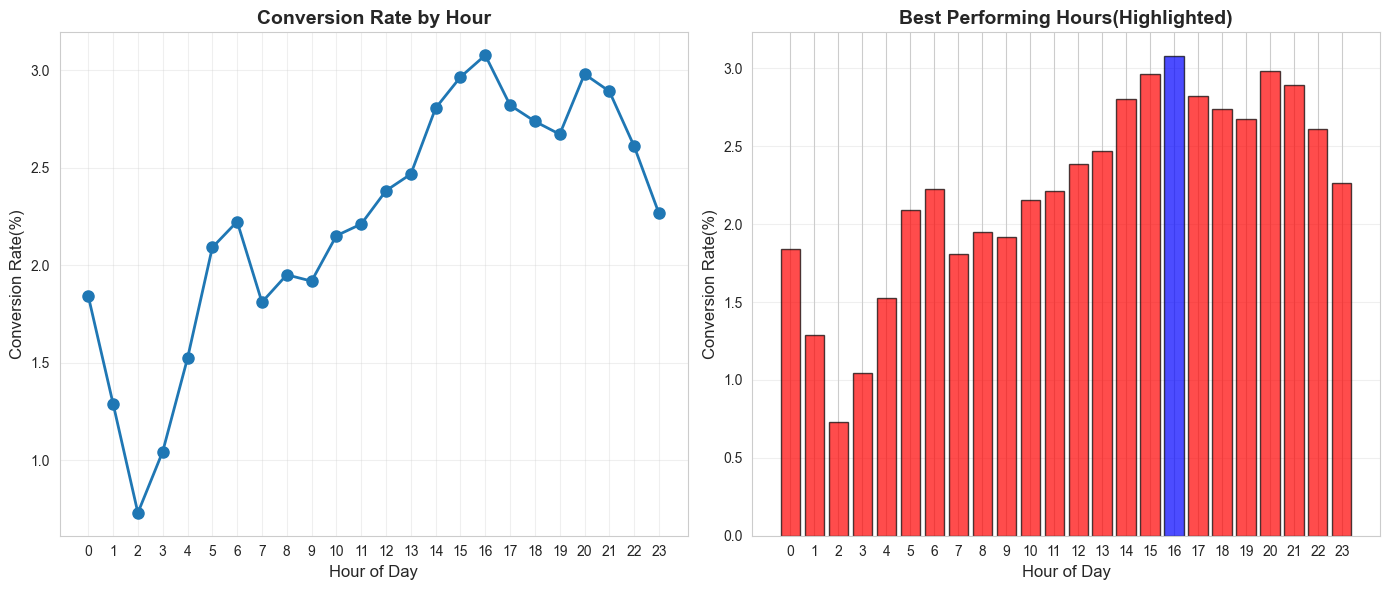

In [3]:
# Visualization 2: Conversion by Hour
print("\nGenerating Visualization 2: Conversion by Hour...")

hour_performance = df.groupby('most_ads_hour').agg({'converted':['sum','count','mean']}).reset_index()
hour_performance.columns = ['hour', 'conversion', 'total_users', 'conversion_rate']
hour_performance['conversion_rate'] *=100
hour_performance= hour_performance.sort_values('hour')

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(hour_performance['hour'], hour_performance['conversion_rate'], marker='o', linewidth=2, markersize=8)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Conversion Rate(%)', fontsize=12)
plt.title('Conversion Rate by Hour', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(hour_performance['hour'])

plt.subplot(1,2,2)
colors= ['blue' if x== hour_performance['conversion_rate'].max() else 'red'
         for x in hour_performance['conversion_rate']]
plt.bar(hour_performance['hour'], hour_performance['conversion_rate'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Conversion Rate(%)', fontsize=12)
plt.title('Best Performing Hours(Highlighted)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.xticks(hour_performance['hour'])

plt.tight_layout()
plt.savefig('conversion_by_hour.png', dpi=300, bbox_inches='tight')
plt.show()



<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Sony\AppData\Local\Temp\ipykernel_15580\85067355.py:2: SyntaxWarning: invalid escape sequence '\G'
  print("\Generating Visualization 3 : Conversion by Day...")


\Generating Visualization 3 : Conversion by Day...


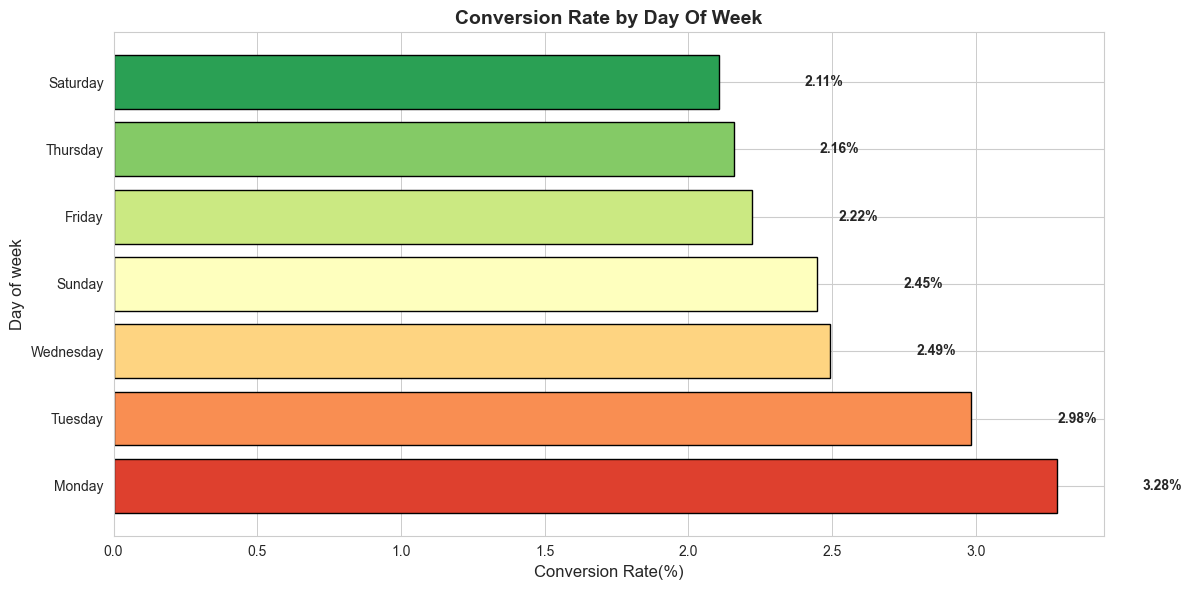

In [4]:
# Visualization 3 : Conversion By Day
print("\Generating Visualization 3 : Conversion by Day...")

day_performance =( 
    df.groupby('most_ads_day')
    .agg({'converted': ['sum','count', 'mean']})
    .reset_index()
)  
day_performance.columns = [
    'day', 'conversions','total_users', 'conversion_rate']
day_performance['conversion_rate'] *= 100
day_performance = day_performance.sort_values(
    'conversion_rate', ascending=False
)

plt.figure(figsize=(12,6))
colors_day = sns.color_palette("RdYlGn", len(day_performance))

plt.barh(
    day_performance['day'], 
    day_performance['conversion_rate'], 
    color = colors_day,
    edgecolor='black'
)
plt.xlabel('Conversion Rate(%)', fontsize=12)
plt.ylabel('Day of week',fontsize=12)
plt.title(
    'Conversion Rate by Day Of Week', 
    fontsize=14, 
    fontweight='bold'
)
plt.grid(axis= 'x',linewidth=0.7)

for i ,(day, rate) in enumerate(
    zip(day_performance['day'],
    day_performance['conversion_rate'])
):
    plt.text(rate + 0.3, i,f'{rate:.2f}%', 
             va='center', fontsize=10,
 fontweight='bold')

plt.tight_layout()
plt.savefig('conversion_by_day.png', dpi=300, bbox_inches='tight') 
plt.show()   


Generating Visualization 4: Ad Frequency Distribution...


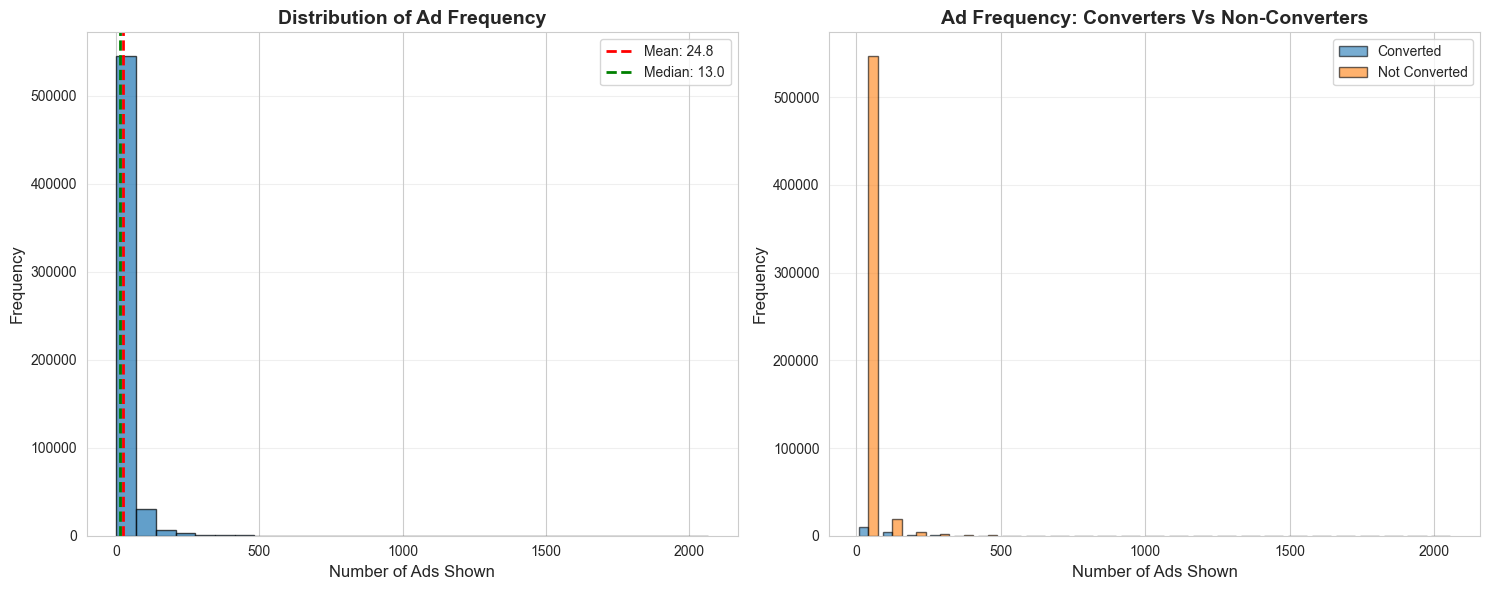

In [5]:
# Visualization 4:AD FREQUENCY DISTRIBUTION
print("\nGenerating Visualization 4: Ad Frequency Distribution...")

fig,axes = plt.subplots(1,2, figsize=(15,6))

# Overall distribution
axes[0].hist(df['total_ads'], bins=30, alpha=0.7, edgecolor='black')
axes[0].axvline(df['total_ads'].mean(), color = 'red', linestyle='--', linewidth=2, label=f'Mean: {df["total_ads"].mean():.1f}')
axes[0].axvline(df['total_ads'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df['total_ads'].median():.1f}')
axes[0].set_xlabel('Number of Ads Shown', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Ad Frequency', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# By conversion status
converted_ads = df[df['converted']==1]['total_ads']
not_converted_ads = df[df['converted']==0]['total_ads']

axes[1].hist([converted_ads, not_converted_ads], bins=25, alpha=0.6, label=['Converted', 'Not Converted'], edgecolor='black')
axes[1].set_xlabel('Number of Ads Shown', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Ad Frequency: Converters Vs Non-Converters', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('ad_frequency_distribution.png',dpi=300, bbox_inches='tight')
plt.show()


Generating Visualization 5: Hour * Day Conversion Heatmap...


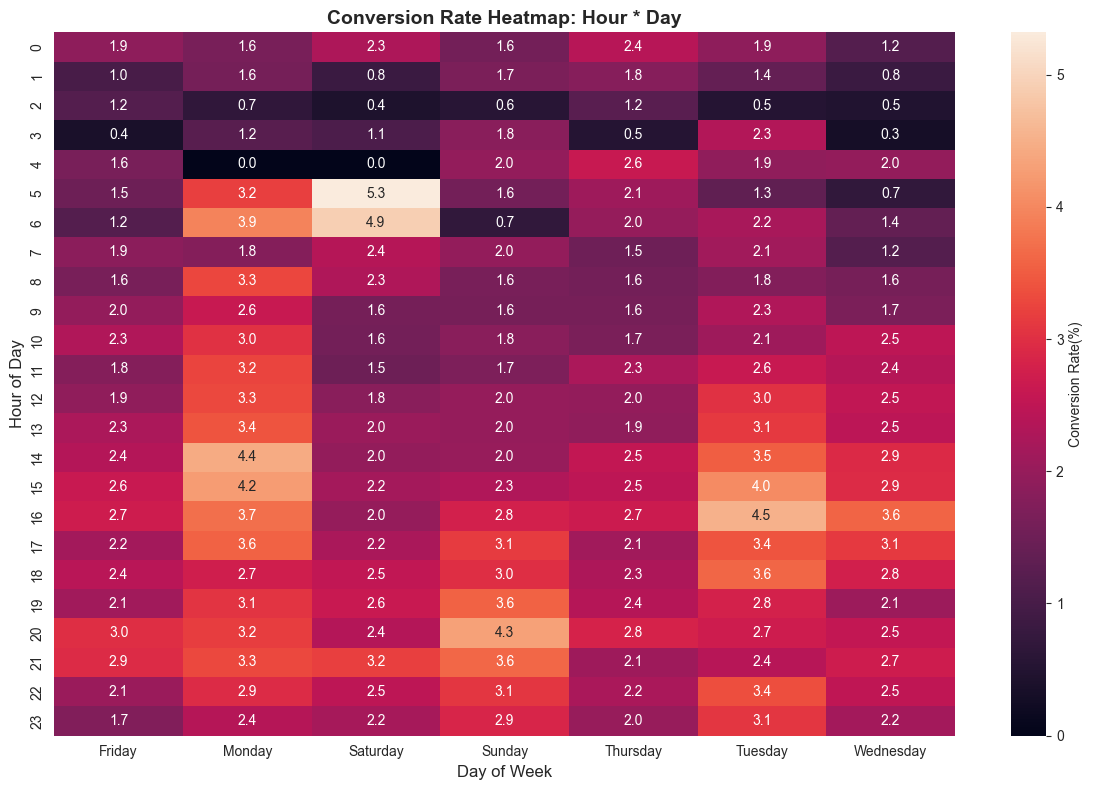

In [6]:
# Visualization 5: HOUR * DAY HEATMAP
print("\nGenerating Visualization 5: Hour * Day Conversion Heatmap...")

heatmap_data=  df.groupby(['most_ads_hour', 'most_ads_day'])['converted'].mean().unstack() * 100

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cbar_kws={'label': 'Conversion Rate(%)'})
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.title('Conversion Rate Heatmap: Hour * Day',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('hour_day_heatmap.png',dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Export result

# Export hour performance

hour_performance= df.groupby('most_ads_hour').agg({
    'user_id': 'count' ,
    'converted' : ['sum', 'mean']
}).round(2)
hour_performance.to_csv('hour_performance.csv')

# Export day performance

day_performance = df.groupby('most_ads_day').agg({
    'user_id' : 'count',
    'converted' : ['sum','mean']
}).round(2)
day_performance.to_csv('day_performance.csv')